In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib_venn import venn2
import seaborn as sns

# check the current working directory
current_working_directory = Path.cwd()
print(current_working_directory)

/Users/elaine/Documents/MRes Project 2/data_for_code


In [12]:
brain_ids = ['JKAY22.3d', 'JKAY22.3e', 'JKAY22.3f', 'JKAY22.3g', 'JKAY22.5d', 'JKAY23.5d'] # ['JKAY22.3d', 'JKAY22.3e', 'JKAY22.3f', 'JKAY22.3g', 'JKAY22.5d', 'JKAY23.5d']
region_order = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
slice_order = [f"Slice {global_idx}" for global_idx in range(13)]
fig_output_dir = f"fig_outputs"

## Enrichment ratio (per slice - aligned)

In [17]:
brain_dfs = []
for brain_id in brain_ids:
    input_dir = f"registered/{brain_id}_reg/calculated_outputs"
    global_slices_enrichment_ratios_filename = f"{input_dir}/global_slices_enrichment_ratios.csv"
    global_slices_enrichment_ratios = pd.read_csv(global_slices_enrichment_ratios_filename)
    brain_dfs.append(global_slices_enrichment_ratios)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_enrichment_ratios = pd.concat(brain_dfs, ignore_index=True)
display(combined_enrichment_ratios)

,Region,Global slice index,TRAPed_alsoVgat,TRAPed_alsoVglut,Brain
0,dmPAG,Slice 2,0.30,1.16,JKAY22.3d
1,dlPAG,Slice 2,0.00,1.12,JKAY22.3d
2,lPAG,Slice 2,0.00,1.07,JKAY22.3d
3,vlPAG,Slice 2,0.31,1.35,JKAY22.3d
4,dmPAG,Slice 3,0.00,1.18,JKAY22.3d
...,...,...,...,...,...
351,vlPAG,Slice 11,0.77,0.93,JKAY23.5d
352,dmPAG,Slice 12,0.58,1.10,JKAY23.5d
353,dlPAG,Slice 12,1.01,0.98,JKAY23.5d
354,lPAG,Slice 12,0.78,0.99,JKAY23.5d


In [18]:
# Reshape to long format for plotting
group_stats_by_region_df = []
long_df_enrichment_ratio_by_region = [] 
for region in region_order:
    long_df_enrichment_ratio = pd.melt(
        combined_enrichment_ratios[combined_enrichment_ratios['Region'] == region],
        id_vars=['Brain', 'Global slice index'],
        value_vars=['TRAPed_alsoVgat', 'TRAPed_alsoVglut'],
        var_name='Measure',
        value_name='Enrichment Ratio'
    )

    # Optional: cleaner names
    long_df_enrichment_ratio['Measure'] = long_df_enrichment_ratio['Measure'].replace({
        'TRAPed_alsoVgat': "TRAPed_alsoVgat",
        'TRAPed_alsoVglut': "TRAPed_alsoVglut"
    })
    long_df_enrichment_ratio['Global slice index'] = pd.Categorical(long_df_enrichment_ratio['Global slice index'], categories=slice_order, ordered=True)
    long_df_enrichment_ratio_by_region.append(long_df_enrichment_ratio)
    
    group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
        Mean='mean',
        SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
    ).reset_index()
#     display(group_stats_enrichment_ratio)
    
    group_stats_by_region_df.append(group_stats_enrichment_ratio)
    
# Add a 'Region' column to each and concatenate
# Add a 'Region' column to each and concatenate
for i, df in enumerate(long_df_enrichment_ratio_by_region):
    df['Region'] = region_order[i]
combined_long_df_enrichment_ratio = pd.concat(long_df_enrichment_ratio_by_region, ignore_index=True)
display(combined_long_df_enrichment_ratio)
for i, df in enumerate(group_stats_by_region_df):
    df['Region'] = region_order[i]
combined_group_stats_enrichment_ratio = pd.concat(group_stats_by_region_df, ignore_index=True)
display(combined_group_stats_enrichment_ratio)

/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_18063/2338647208.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_18063/2338647208.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_18063/2338647208.py:21: FutureWarning: The default 

,Brain,Global slice index,Measure,Enrichment Ratio,Region
0,JKAY22.3d,Slice 2,TRAPed_alsoVgat,0.30,dmPAG
1,JKAY22.3d,Slice 3,TRAPed_alsoVgat,0.00,dmPAG
2,JKAY22.3d,Slice 4,TRAPed_alsoVgat,0.30,dmPAG
3,JKAY22.3d,Slice 4,TRAPed_alsoVgat,0.22,dmPAG
4,JKAY22.3d,Slice 5,TRAPed_alsoVgat,0.07,dmPAG
...,...,...,...,...,...
707,JKAY23.5d,Slice 9,TRAPed_alsoVglut,0.59,vlPAG
708,JKAY23.5d,Slice 10,TRAPed_alsoVglut,0.86,vlPAG
709,JKAY23.5d,Slice 11,TRAPed_alsoVglut,0.76,vlPAG
710,JKAY23.5d,Slice 11,TRAPed_alsoVglut,0.93,vlPAG


,Global slice index,Measure,Mean,SEM,Region
0,Slice 0,TRAPed_alsoVgat,0.000000,0.000000,dmPAG
1,Slice 0,TRAPed_alsoVglut,0.552500,0.319149,dmPAG
2,Slice 1,TRAPed_alsoVgat,0.000000,0.000000,dmPAG
3,Slice 1,TRAPed_alsoVglut,0.820000,0.278927,dmPAG
4,Slice 2,TRAPed_alsoVgat,0.158000,0.067754,dmPAG
...,...,...,...,...,...
99,Slice 10,TRAPed_alsoVglut,0.748571,0.037253,vlPAG
100,Slice 11,TRAPed_alsoVgat,0.575714,0.068482,vlPAG
101,Slice 11,TRAPed_alsoVglut,0.734286,0.037913,vlPAG
102,Slice 12,TRAPed_alsoVgat,0.727500,0.264209,vlPAG


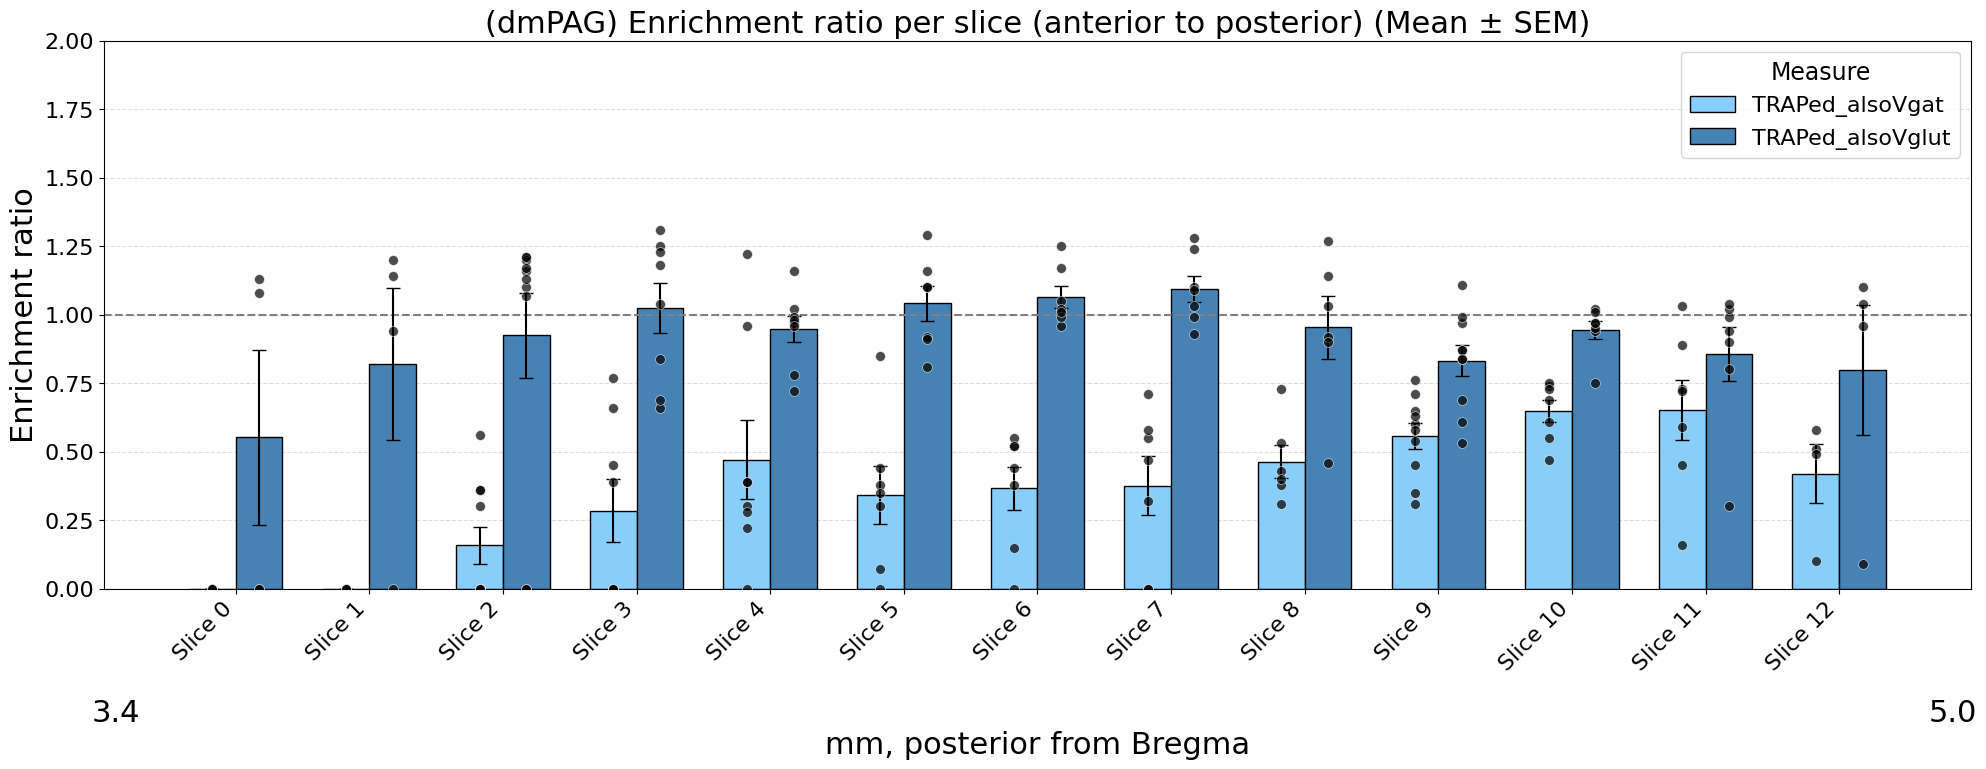

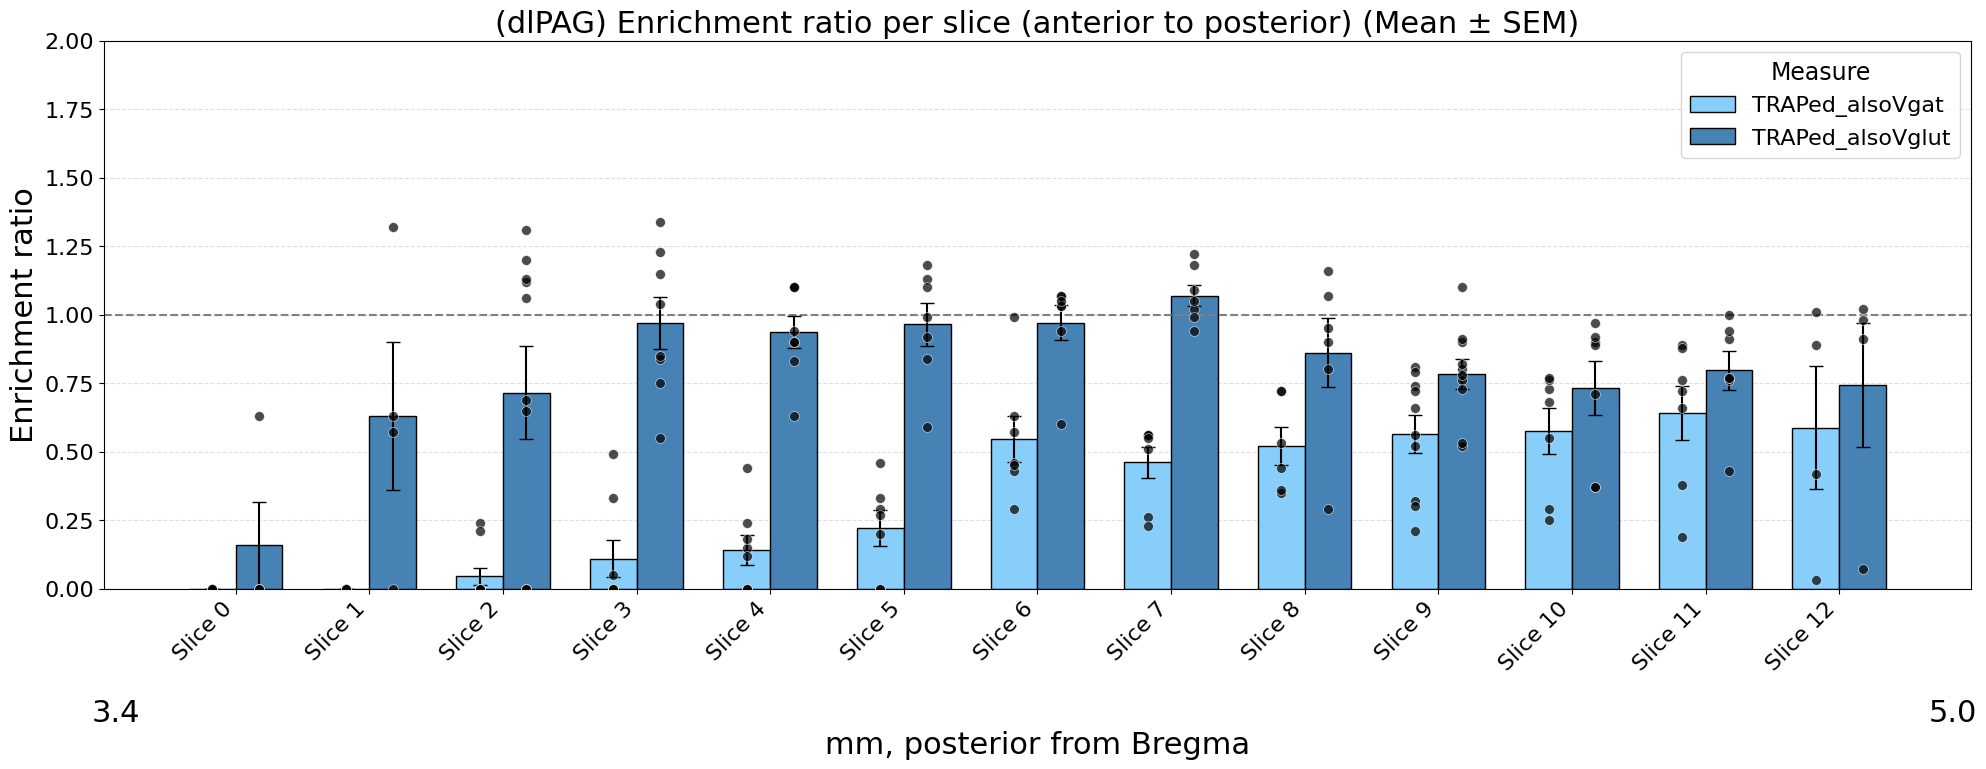

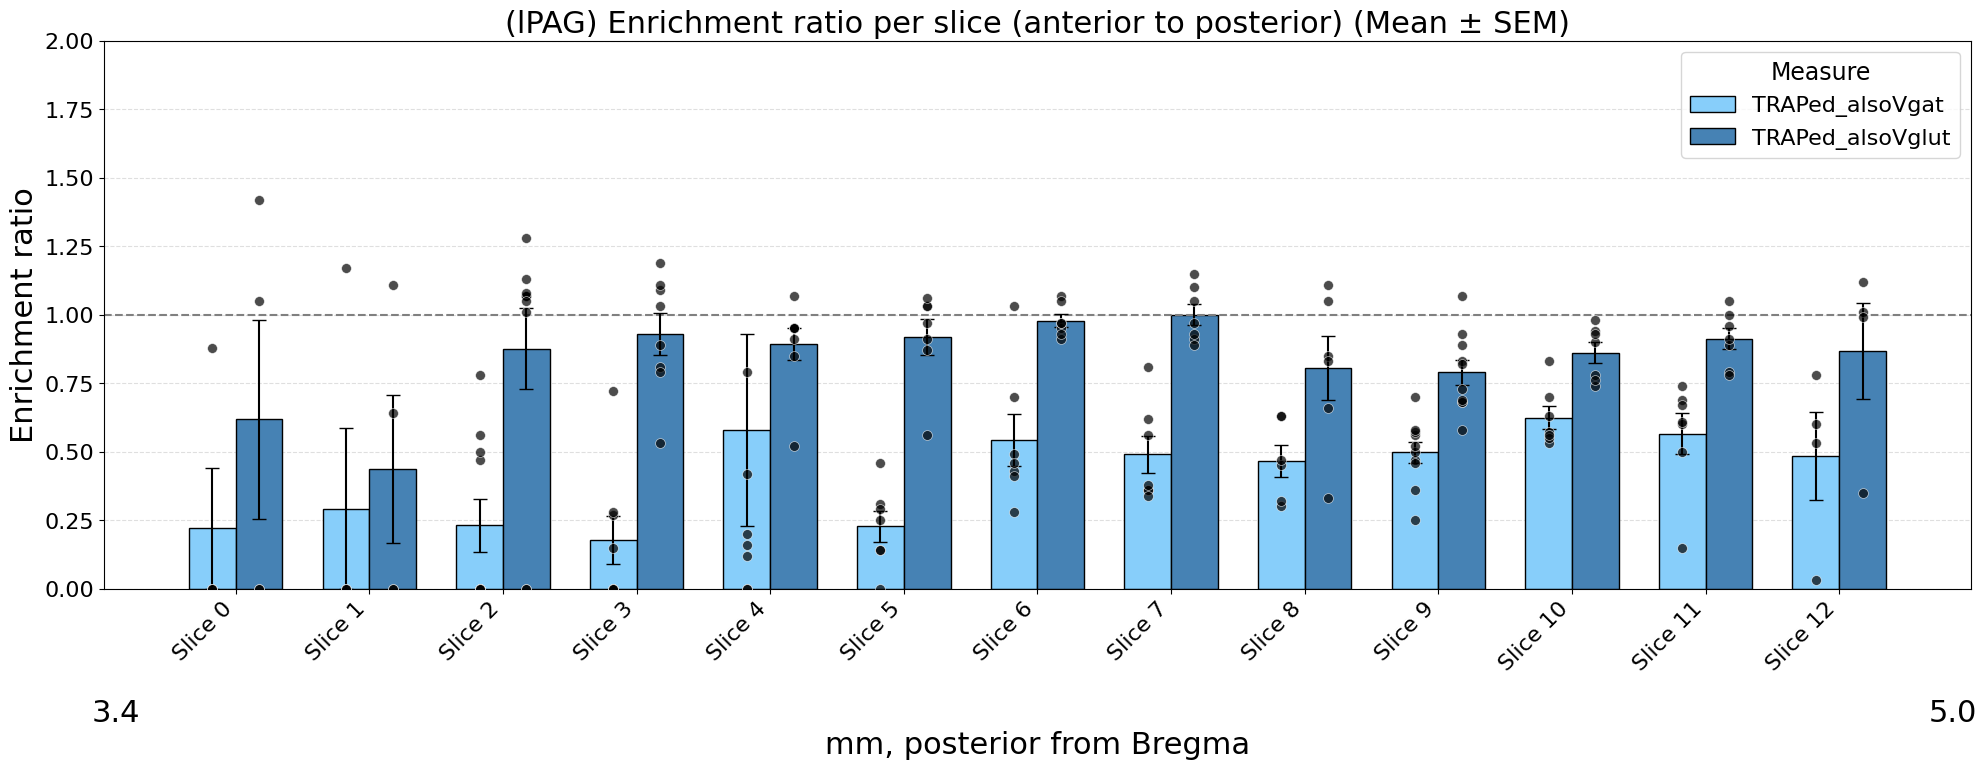

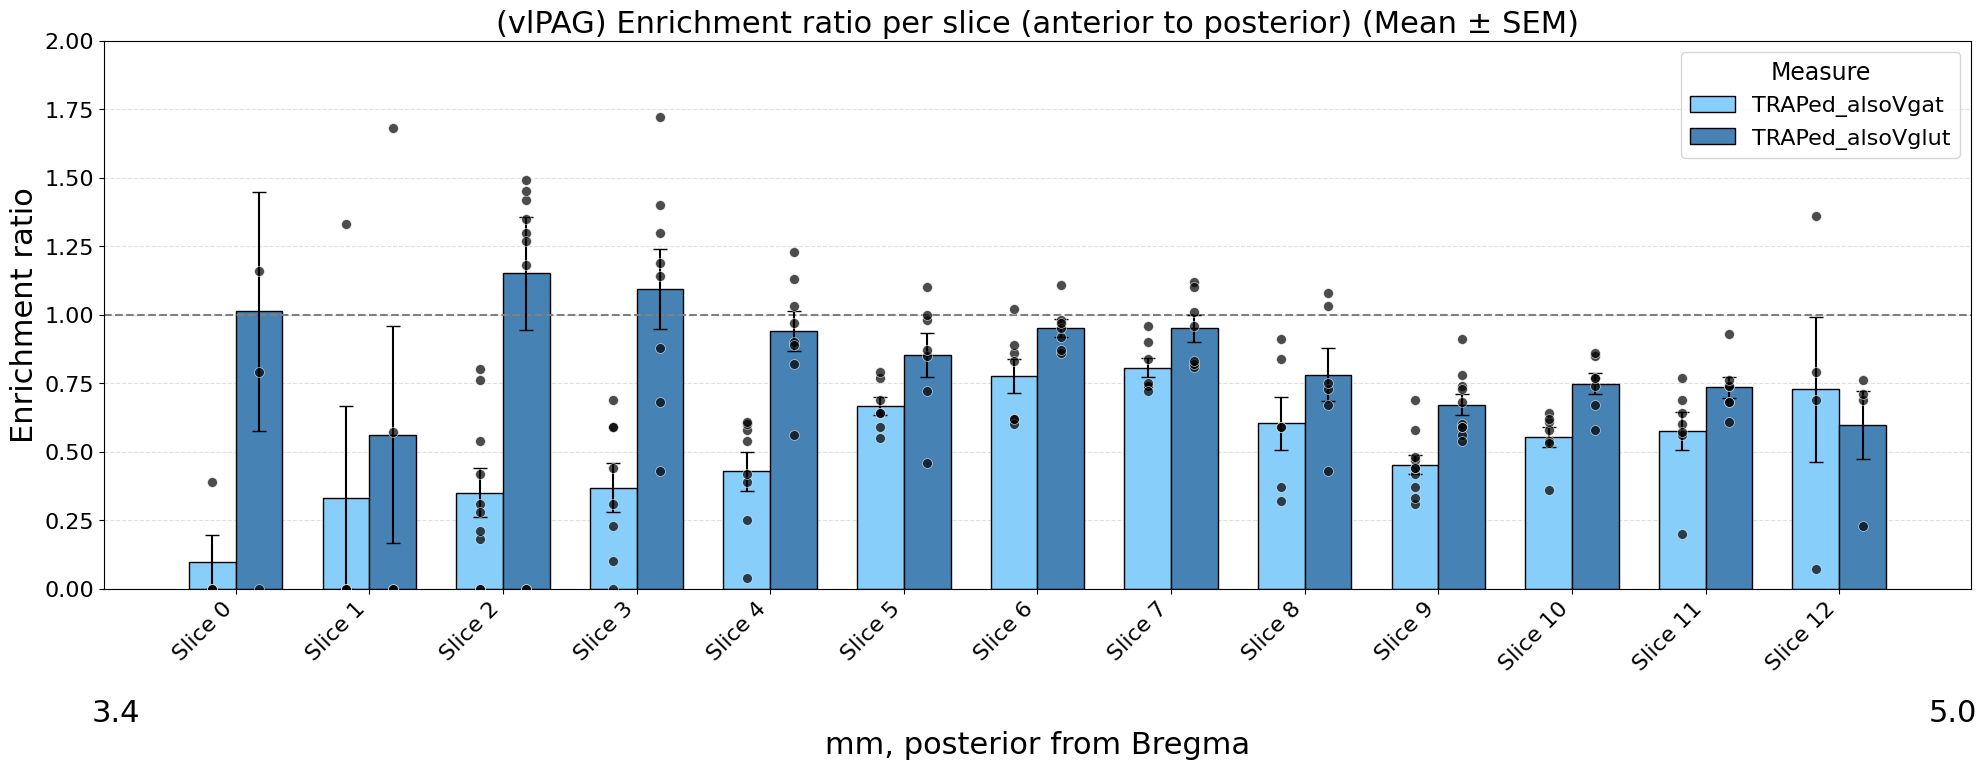

In [19]:
# Set up plot style
palette = {
    "TRAPed_alsoVgat": 'lightskyblue',
    "TRAPed_alsoVglut": 'steelblue'
}
measures = ["TRAPed_alsoVgat", "TRAPed_alsoVglut"]

for region in region_order:
    # Create one big plot per region
    fig, ax = plt.subplots(figsize=(20, 8))
    group_stats_df_enrichment = combined_group_stats_enrichment_ratio[combined_group_stats_enrichment_ratio['Region'] == region]
    long_form_df_enrichment = combined_long_df_enrichment_ratio[combined_long_df_enrichment_ratio['Region'] == region]
    
    # Setup
    num_slices = len(slice_order)
    bar_width = 0.35
    x_spacing = 1  # space between region groups
    x_offsets = [-bar_width/2, bar_width/2]  # offsets for the two measures

    # Create positions for each region group
    slice_positions = np.arange(num_slices) * x_spacing

    for i, slice_idx in enumerate(slice_order):
        # Filter data for region
        stats_sub = group_stats_df_enrichment[group_stats_df_enrichment['Global slice index'] == slice_idx]
        data_sub = long_form_df_enrichment[long_form_df_enrichment['Global slice index'] == slice_idx]

        for j, measure in enumerate(measures):
            mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
            sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
            color = palette[measure]
            xpos = slice_positions[i] + x_offsets[j]

            # Bar with error
            ax.bar(
                xpos,
                mean,
                yerr=sem,
                width=bar_width,
                color=color,
                edgecolor='black',
                capsize=5,
                label=measure if i == 0 else "",  # only add to legend once
                zorder=2
            )

            # Overlay brain-level dots
            brain_vals = data_sub[data_sub['Measure'] == measure]['Enrichment Ratio']
            ax.scatter(
                np.full(len(brain_vals), xpos),
                brain_vals,
                color='black',
                s=50,
                zorder=3,
                alpha=0.7,
                edgecolor='white',
                linewidth=0.5
            )

    # Formatting
    ax.set_xticks(slice_positions)
    ax.set_xticklabels(slice_order, rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel('Enrichment ratio', fontsize=22)
    ax.set_ylim(0, 2)
    ax.axhline(1, ls="--", color="gray")
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
    
    # Add "3.4" and "5.0" at the far left and right of the x-axis
    ax.text(
        slice_positions[0] - 0.9,  # adjust to move left
        -0.4,                         # vertical offset in data units
        "3.4",
        ha='center',
        va='top',
        fontsize=22
    )

    ax.text(
        slice_positions[-1] + 0.85,  # adjust to move right
        -0.4,
        "5.0",
        ha='center',
        va='top',
        fontsize=22
    )

    # Add a secondary x-axis label
    ax.annotate(
        'mm, posterior from Bregma',
        xy=(0.5, -0.3),
        xycoords='axes fraction',
        ha='center',
        fontsize=22
    )


    # Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Measure', loc='upper right', fontsize=16, title_fontsize=17)

    # Title and save
    plt.title(f'({region}) Enrichment ratio per slice (anterior to posterior) (Mean ± SEM)', fontsize=22)
    plt.tight_layout()
#     plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # adds room at bottom
    fig_filepath = Path(f"{fig_output_dir}/{region}_enrichment_ratios.png")
    fig_filepath.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(fig_filepath)
    plt.show()


## Vgat_alsoTRAP/Vglut_alsoTRAP

In [27]:
brain_ids = ['JKAY22.3d', 'JKAY22.3e', 'JKAY22.3f', 'JKAY22.3g', 'JKAY22.5d', 'JKAY23.5d'] # ['JKAY22.3d', 'JKAY22.3e', 'JKAY22.3f', 'JKAY22.3g', 'JKAY22.5d', 'JKAY23.5d']
region_order = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
slice_order = [f"Slice {global_idx}" for global_idx in range(13)]
fig_output_dir = f"fig_outputs"
brain_dfs = []
for brain_id in brain_ids:
    input_dir = f"registered/{brain_id}_reg/calculated_outputs"
    vgat_vglut_alsoTRAP_filename = f"{input_dir}/vgat_vglut_alsoTRAP.csv"
    vgat_vglut_alsoTRAP = pd.read_csv(vgat_vglut_alsoTRAP_filename)
    brain_dfs.append(vgat_vglut_alsoTRAP)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_vgat_vglut_alsoTRAP = pd.concat(brain_dfs, ignore_index=True)
display(combined_vgat_vglut_alsoTRAP)

filepath = Path(f'{fig_output_dir}/vgat_vglut_freezing_per_brain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
combined_vgat_vglut_alsoTRAP.to_csv(filepath, index=False) 

,Region,Vgat_alsoTRAPed_percent,Vglut_alsoTRAPed_percent,Brain
0,dmPAG,14.06,37.42,JKAY22.3d
1,dlPAG,23.46,48.62,JKAY22.3d
2,lPAG,37.29,53.23,JKAY22.3d
3,vlPAG,58.48,58.97,JKAY22.3d
4,dmPAG,22.56,40.58,JKAY22.3e
5,dlPAG,26.82,45.69,JKAY22.3e
6,lPAG,39.52,48.20,JKAY22.3e
7,vlPAG,49.02,47.68,JKAY22.3e
8,dmPAG,26.84,36.31,JKAY22.3f
9,dlPAG,53.09,58.26,JKAY22.3f


In [28]:
# Reshape to long format for plotting
long_df_vgat_vglut_freezing = pd.melt(
    combined_vgat_vglut_alsoTRAP,
    id_vars=['Brain', 'Region'],
    value_vars=['Vgat_alsoTRAPed_percent', 'Vglut_alsoTRAPed_percent'],
    var_name='Measure',
    value_name='Percent'
)

# Optional: cleaner names
long_df_vgat_vglut_freezing['Measure'] = long_df_vgat_vglut_freezing['Measure'].replace({
    'Vgat_alsoTRAPed_percent': "(Freezing) Vgat+ TRAPed",
    'Vglut_alsoTRAPed_percent': "(Freezing) Vglut+ TRAPed"
})
long_df_vgat_vglut_freezing['Region'] = pd.Categorical(long_df_vgat_vglut_freezing['Region'], categories=region_order, ordered=True)

group_stats_vgat_vglut_freezing = long_df_vgat_vglut_freezing.groupby(['Region', 'Measure'])['Percent'].agg(
    Mean='mean',
    SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
).reset_index()
display(group_stats_vgat_vglut_freezing)

filepath = Path(f'{fig_output_dir}/vgat_vglut_freezing.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
group_stats_vgat_vglut_freezing.to_csv(filepath, index=False) 


/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20039/3814957686.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_vgat_vglut_freezing = long_df_vgat_vglut_freezing.groupby(['Region', 'Measure'])['Percent'].agg(


,Region,Measure,Mean,SEM
0,dmPAG,(Freezing) Vgat+ TRAPed,25.475000,4.246488
1,dmPAG,(Freezing) Vglut+ TRAPed,43.480000,4.667320
2,dlPAG,(Freezing) Vgat+ TRAPed,33.473333,4.408933
3,dlPAG,(Freezing) Vglut+ TRAPed,54.351667,2.773899
4,lPAG,(Freezing) Vgat+ TRAPed,42.470000,4.270482
5,lPAG,(Freezing) Vglut+ TRAPed,52.148333,2.047967
6,vlPAG,(Freezing) Vgat+ TRAPed,48.783333,3.837550
7,vlPAG,(Freezing) Vglut+ TRAPed,54.276667,2.204655


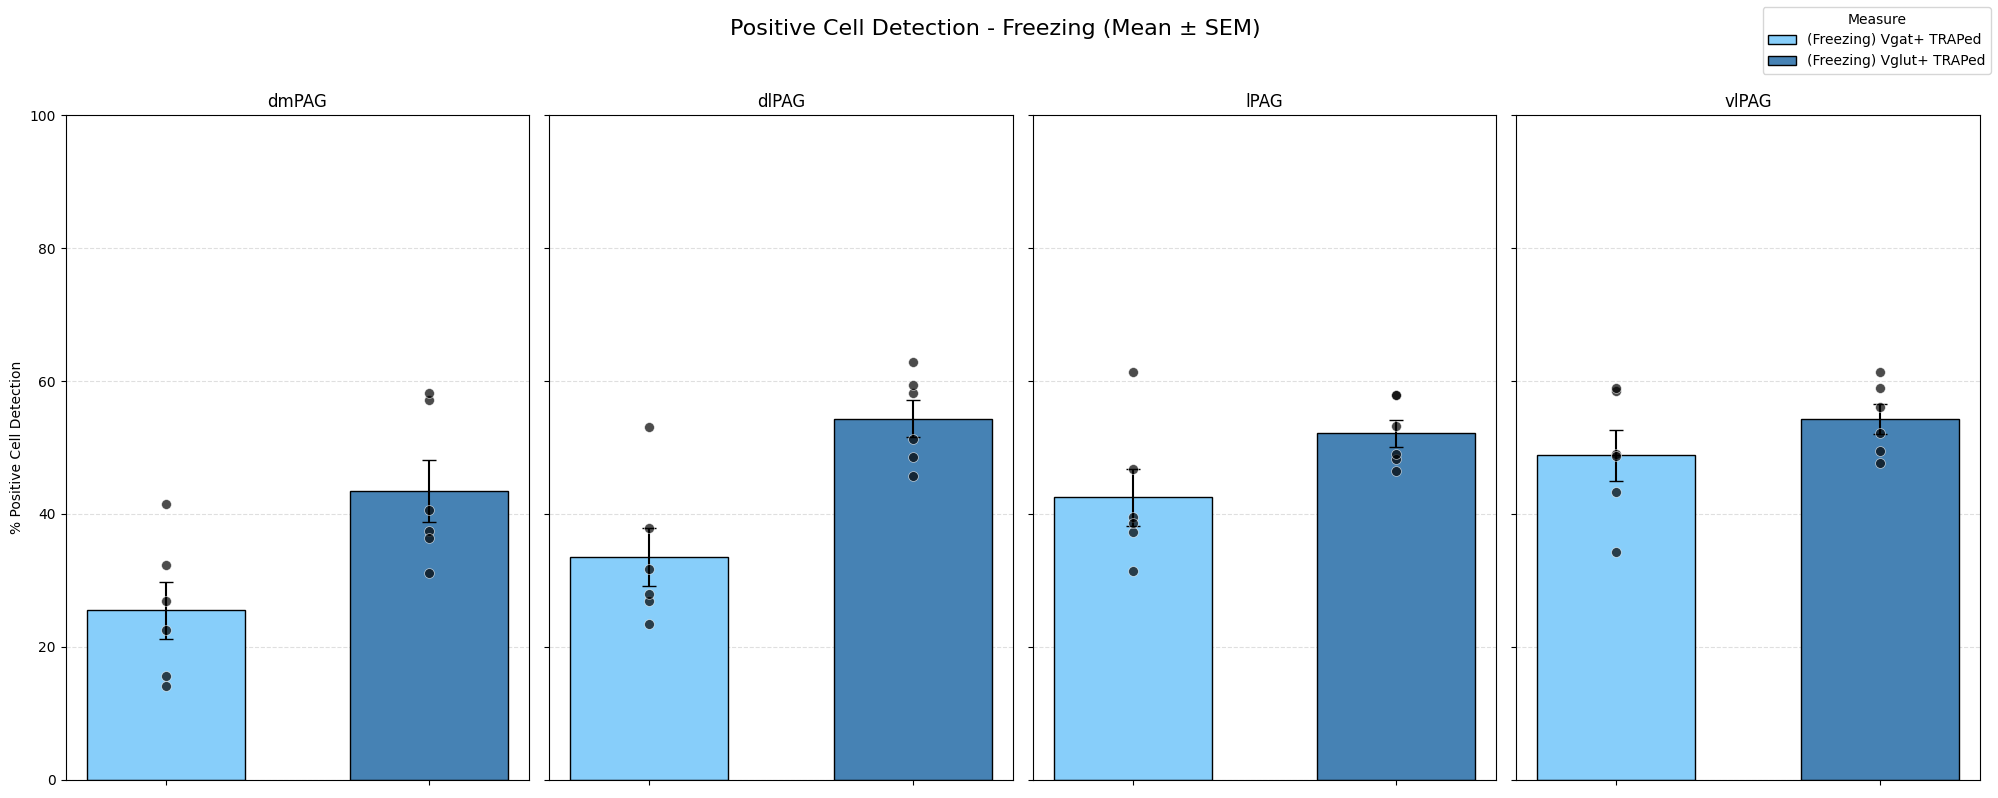

In [30]:
# Set up plot style
palette = {
    "(Freezing) Vgat+ TRAPed": 'lightskyblue',
    "(Freezing) Vglut+ TRAPed": 'steelblue'
}
measures = ["(Freezing) Vgat+ TRAPed", "(Freezing) Vglut+ TRAPed"]

# Create 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

for i, region in enumerate(region_order):
    ax = axes[i]

    # Filter data
    stats_sub = group_stats_vgat_vglut_freezing[group_stats_vgat_vglut_freezing['Region'] == region]
    data_sub = long_df_vgat_vglut_freezing[long_df_vgat_vglut_freezing['Region'] == region]
#     display(stats_sub)
#     display(data_sub)

    # Create slight x-offset for spacing between bars
    x_positions = np.array([0, 1])  # two bars per plot
    bar_width = 0.6

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = x_positions[j]

        # Draw bar with black edge
        bar = ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # avoid duplicate legends
            zorder=2
        )

        # Overlay individual dots (brains)
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

    # Format each subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels([]) # ax.set_xticklabels(measures, rotation=45)
    ax.set_title(region)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Y label on first subplot
axes[0].set_ylabel('% Positive Cell Detection')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Measure')

plt.suptitle('Positive Cell Detection - Freezing (Mean ± SEM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig_filepath = Path(f"{fig_output_dir}/vgat_vglut_alsoTRAP.png")  
fig_filepath.parent.mkdir(parents=True, exist_ok=True)  
plt.savefig(fig_filepath)
plt.show()

,Region,Vgat_alsoTRAPed_percent,Vglut_alsoTRAPed_percent,Brain
0,dmPAG,3.86,5.69,JKAY4.2b
1,dlPAG,39.02,47.39,JKAY4.2b
2,lPAG,63.64,68.42,JKAY4.2b
3,vlPAG,36.41,44.74,JKAY4.2b
4,dmPAG,27.06,24.12,JKAY11.1g
5,dlPAG,48.85,54.69,JKAY11.1g
6,lPAG,65.24,67.34,JKAY11.1g
7,vlPAG,65.19,77.23,JKAY11.1g
8,dmPAG,0.21,1.27,JKAY11.2g
9,dlPAG,21.84,28.39,JKAY11.2g


,Brain,Region,Measure,Percent
0,JKAY4.2b,dmPAG,(Retrieval) Vgat+ TRAPed,3.86
1,JKAY4.2b,dlPAG,(Retrieval) Vgat+ TRAPed,39.02
2,JKAY4.2b,lPAG,(Retrieval) Vgat+ TRAPed,63.64
3,JKAY4.2b,vlPAG,(Retrieval) Vgat+ TRAPed,36.41
4,JKAY11.1g,dmPAG,(Retrieval) Vgat+ TRAPed,27.06
...,...,...,...,...
75,JKAY22.5d,vlPAG,(Freezing) Vglut+ TRAPed,52.10
76,JKAY23.5d,dmPAG,(Freezing) Vglut+ TRAPed,31.16
77,JKAY23.5d,dlPAG,(Freezing) Vglut+ TRAPed,51.27
78,JKAY23.5d,lPAG,(Freezing) Vglut+ TRAPed,46.51


/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20039/1891191168.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_vgat_vglut_retrieval = long_df_vgat_vglut_retrieval.groupby(['Region', 'Measure'])['Percent'].agg(


,Region,Measure,Mean,SEM
0,dmPAG,(Retrieval) Vgat+ TRAPed,15.6475,7.945344
1,dmPAG,(Retrieval) Vglut+ TRAPed,19.3100,10.226618
2,dlPAG,(Retrieval) Vgat+ TRAPed,41.0150,7.134833
3,dlPAG,(Retrieval) Vglut+ TRAPed,49.3800,8.087878
4,lPAG,(Retrieval) Vgat+ TRAPed,58.7325,5.079540
5,lPAG,(Retrieval) Vglut+ TRAPed,63.8500,5.313967
6,vlPAG,(Retrieval) Vgat+ TRAPed,65.6400,10.604808
7,vlPAG,(Retrieval) Vglut+ TRAPed,71.7550,9.452908


,Region,Measure,Mean,SEM
0,dmPAG,(Retrieval) Vgat+ TRAPed,15.647500,7.945344
1,dmPAG,(Retrieval) Vglut+ TRAPed,19.310000,10.226618
2,dlPAG,(Retrieval) Vgat+ TRAPed,41.015000,7.134833
3,dlPAG,(Retrieval) Vglut+ TRAPed,49.380000,8.087878
4,lPAG,(Retrieval) Vgat+ TRAPed,58.732500,5.079540
5,lPAG,(Retrieval) Vglut+ TRAPed,63.850000,5.313967
6,vlPAG,(Retrieval) Vgat+ TRAPed,65.640000,10.604808
7,vlPAG,(Retrieval) Vglut+ TRAPed,71.755000,9.452908
8,dmPAG,(Freezing) Vgat+ TRAPed,25.475000,4.246488
9,dmPAG,(Freezing) Vglut+ TRAPed,43.480000,4.667320


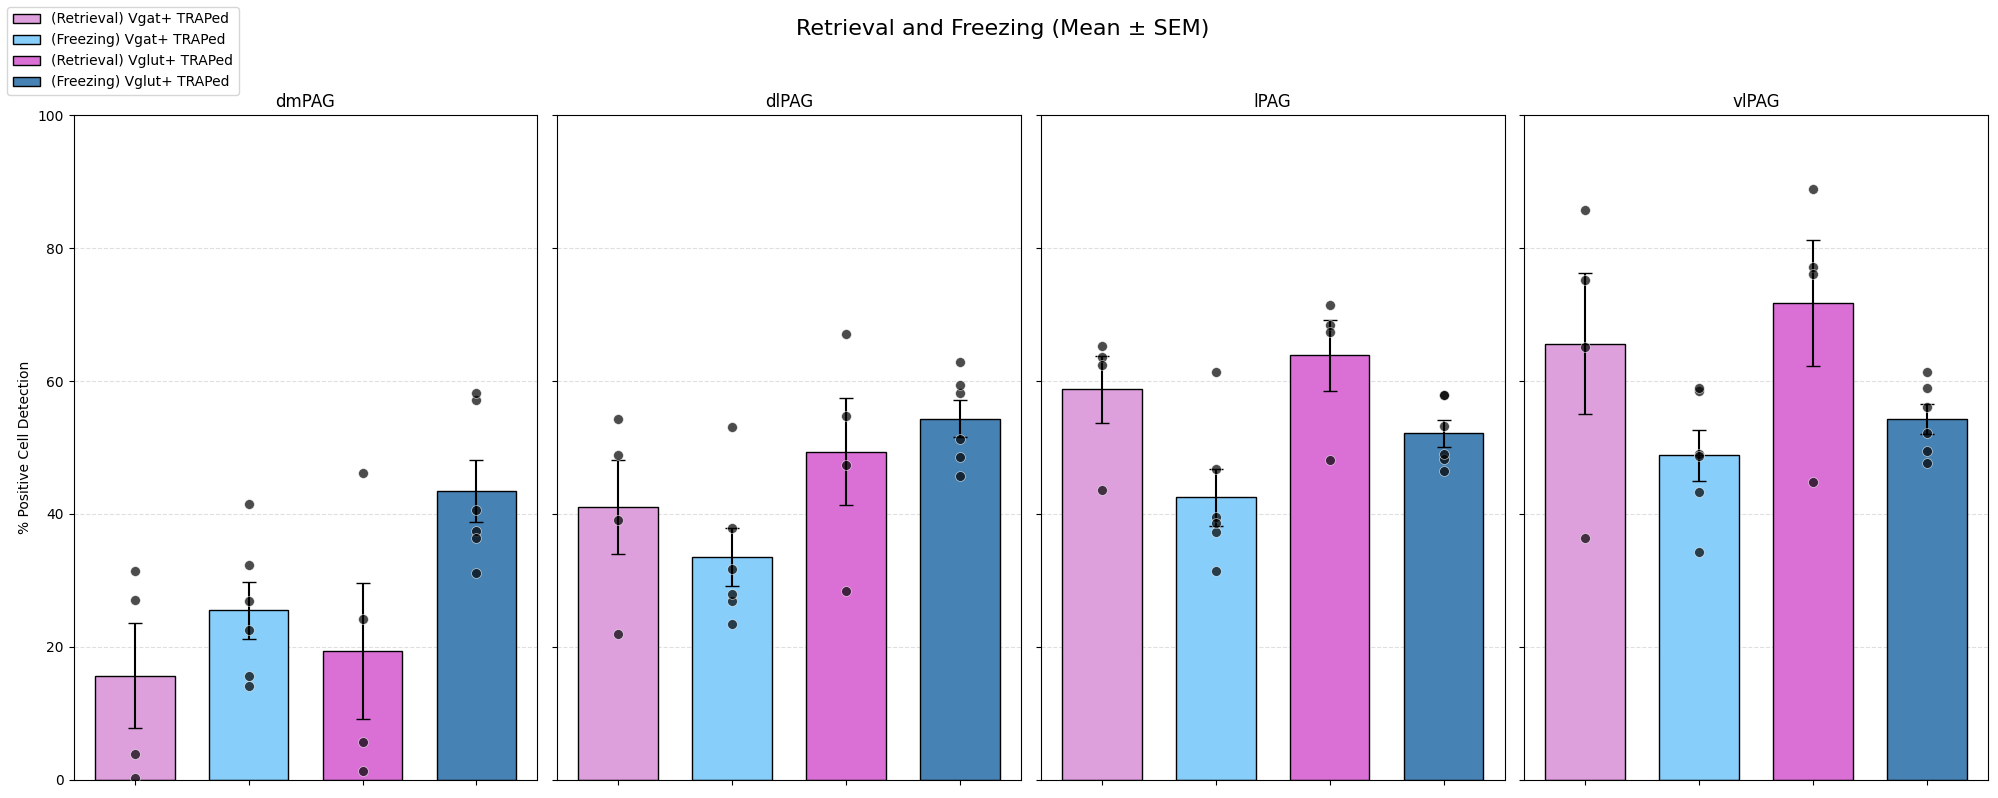

In [35]:
# try to combine with TRAP_retrieval data
brain_ids = ['JKAY4.2b', 'JKAY11.1g', 'JKAY11.2g', 'JKAY11.6c'] 
region_order = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
slice_order = [f"Slice {global_idx}" for global_idx in range(9)]
fig_output_dir = f"fig_outputs"

brain_dfs = []
for brain_id in brain_ids:
    retrieval_input_dir = f"TRAP(retrieval)-specific code/registered/{brain_id}/calculated_outputs"
    vgat_vglut_alsoTRAP_filename = f"{retrieval_input_dir}/vgat_vglut_alsoTRAP.csv"
    vgat_vglut_alsoTRAP = pd.read_csv(vgat_vglut_alsoTRAP_filename)
    brain_dfs.append(vgat_vglut_alsoTRAP)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_vgat_vglut_alsoTRAP = pd.concat(brain_dfs, ignore_index=True)
display(combined_vgat_vglut_alsoTRAP)

# filepath = Path(f'{fig_output_dir}/vgat_vglut_retrieval_per_brain.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# combined_vgat_vglut_alsoTRAP.to_csv(filepath, index=False)

# Reshape to long format for plotting
long_df_vgat_vglut_retrieval = pd.melt(
    combined_vgat_vglut_alsoTRAP,
    id_vars=['Brain', 'Region'],
    value_vars=['Vgat_alsoTRAPed_percent', 'Vglut_alsoTRAPed_percent'],
    var_name='Measure',
    value_name='Percent'
)

# Optional: cleaner names
long_df_vgat_vglut_retrieval['Measure'] = long_df_vgat_vglut_retrieval['Measure'].replace({
    'Vgat_alsoTRAPed_percent': "(Retrieval) Vgat+ TRAPed",
    'Vglut_alsoTRAPed_percent': "(Retrieval) Vglut+ TRAPed"
})
long_df_vgat_vglut_retrieval['Region'] = pd.Categorical(long_df_vgat_vglut_retrieval['Region'], categories=region_order, ordered=True)

long_df_vgat_vglut = pd.concat([long_df_vgat_vglut_retrieval, long_df_vgat_vglut_freezing], ignore_index=True)
display(long_df_vgat_vglut)

group_stats_vgat_vglut_retrieval = long_df_vgat_vglut_retrieval.groupby(['Region', 'Measure'])['Percent'].agg(
    Mean='mean',
    SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
).reset_index()
display(group_stats_vgat_vglut_retrieval)

group_stats_vgat_vglut = pd.concat([group_stats_vgat_vglut_retrieval, group_stats_vgat_vglut_freezing], ignore_index=True)
display(group_stats_vgat_vglut)


# filepath = Path(f'{fig_output_dir}/vgat_vglut_retrieval.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# group_stats_vgat_vglut.to_csv(filepath, index=False) 
# Set up plot style

palette = {
    "(Retrieval) Vgat+ TRAPed": 'plum',
    "(Freezing) Vgat+ TRAPed": 'lightskyblue',
    "(Retrieval) Vglut+ TRAPed": 'orchid',
    "(Freezing) Vglut+ TRAPed": 'steelblue'
}
measures = ["(Retrieval) Vgat+ TRAPed", "(Freezing) Vgat+ TRAPed", "(Retrieval) Vglut+ TRAPed", "(Freezing) Vglut+ TRAPed"]

# Create 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

for i, region in enumerate(region_order):
    ax = axes[i]

    # Filter data
    stats_sub = group_stats_vgat_vglut[group_stats_vgat_vglut['Region'] == region]
    data_sub = long_df_vgat_vglut[long_df_vgat_vglut['Region'] == region]
#     display(stats_sub)
#     display(data_sub)

    # Create slight x-offset for spacing between bars
    x_positions = np.array([0, 1, 2, 3])  # two bars per plot
    bar_width = 0.7

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = x_positions[j]

        # Draw bar with black edge
        bar = ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # avoid duplicate legends
            zorder=2
        )

        # Overlay individual dots (brains)
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

    # Format each subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels([]) # ax.set_xticklabels(measures, rotation=45)
    ax.set_title(region)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Y label on first subplot
axes[0].set_ylabel('% Positive Cell Detection')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

plt.suptitle('Retrieval and Freezing (Mean ± SEM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig_filepath = Path(f"{fig_output_dir}/vgat_vglut_alsoTRAP(retrieval-freezing).png")  
fig_filepath.parent.mkdir(parents=True, exist_ok=True)  
plt.savefig(fig_filepath)
plt.show()

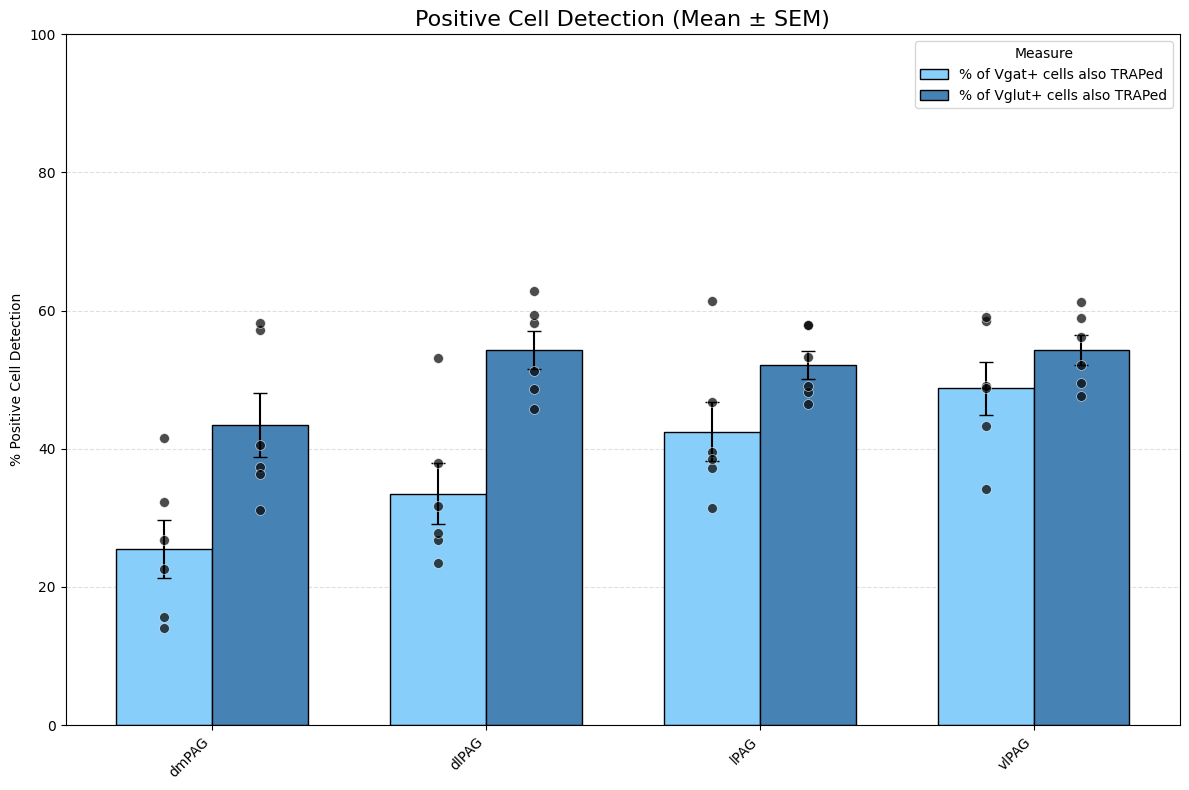

In [16]:
# Create one big plot
fig, ax = plt.subplots(figsize=(12, 8))

# Setup
num_regions = len(region_order)
bar_width = 0.35
x_spacing = 1  # space between region groups
x_offsets = [-bar_width/2, bar_width/2]  # offsets for the two measures

# Create positions for each region group
region_positions = np.arange(num_regions) * x_spacing

for i, region in enumerate(region_order):
    # Filter data for region
    stats_sub = group_stats_vgat_vglut[group_stats_vgat_vglut['Region'] == region]
    data_sub = long_df_vgat_vglut[long_df_vgat_vglut['Region'] == region]

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = region_positions[i] + x_offsets[j]

        # Bar with error
        ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # only add to legend once
            zorder=2
        )

        # Overlay brain-level dots
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

# Formatting
ax.set_xticks(region_positions)
ax.set_xticklabels(region_order, rotation=45, ha='right')
ax.set_ylabel('% Positive Cell Detection')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Measure', loc='upper right')

# Title and save
plt.title('Positive Cell Detection (Mean ± SEM)', fontsize=16)
plt.tight_layout()
# fig_filepath = Path(f"{fig_output_dir}/vgat_vglut_groupedbar.png")
# fig_filepath.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(fig_filepath)
plt.show()


## TRAP/cfos overlap

In [45]:
brain_dfs = []
for brain_id in brain_ids:
    input_dir = f"registered/{brain_id}_reg/calculated_outputs"
    overlap_combined_filename = f"{input_dir}/overlap_combined.csv"
    overlap_combined = pd.read_csv(overlap_combined_filename)
    brain_dfs.append(overlap_combined)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_df = pd.concat(brain_dfs, ignore_index=True)
display(combined_df)

,Region,DAPIcells_alsoTRAPed_numerator,DAPIcells_alsoCfos_numerator,TRAPed_alsoCfos_numerator,TRAPed_alsoCfos_denominator,Cfos_alsoTRAPed_numerator,Cfos_alsoTRAPed_denominator,min_numerator,TRAPed_alsoCfos_percent,Cfos_alsoTRAPed_percent,Brain
0,dmPAG,3522,1410,638,3171,313,1033,313,9.87,30.30,JKAY22.3d
1,dlPAG,4586,1715,1124,4010,720,1282,720,17.96,56.16,JKAY22.3d
2,lPAG,7253,3621,2528,6736,1874,3055,1874,27.82,61.34,JKAY22.3d
3,vlPAG,9055,4948,3773,8600,2783,4141,2783,32.36,67.21,JKAY22.3d
4,dmPAG,2873,1222,510,3334,388,1116,388,11.64,34.77,JKAY22.3e
5,dlPAG,3546,1590,814,3647,636,1422,636,17.44,44.73,JKAY22.3e
6,lPAG,6701,3197,2323,7735,1700,3441,1700,21.98,49.40,JKAY22.3e
7,vlPAG,8407,4630,3371,9320,2820,4945,2820,30.26,57.03,JKAY22.3e
8,dmPAG,4634,1073,462,3540,291,856,291,8.22,34.00,JKAY22.3f
9,dlPAG,5594,1333,736,4129,686,1132,686,16.61,60.60,JKAY22.3f


In [46]:
# Reshape to long format for plotting
long_df = pd.melt(
    combined_df,
    id_vars=['Brain', 'Region'],
    value_vars=['TRAPed_alsoCfos_percent', 'Cfos_alsoTRAPed_percent'],
    var_name='Measure',
    value_name='Percent'
)

# Optional: cleaner names
long_df['Measure'] = long_df['Measure'].replace({
    'TRAPed_alsoCfos_percent': "% of TRAPed also c-fos",
    'Cfos_alsoTRAPed_percent': "% of c-fos also TRAPed"
})

group_stats = long_df.groupby(['Region', 'Measure'])['Percent'].agg(
    Mean='mean',
    SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
).reset_index()
display(group_stats)

,Region,Measure,Mean,SEM
0,dlPAG,% of TRAPed also c-fos,17.571667,0.683586
1,dlPAG,% of c-fos also TRAPed,55.680000,2.985975
2,dmPAG,% of TRAPed also c-fos,9.971667,0.660391
3,dmPAG,% of c-fos also TRAPed,37.513333,4.010971
4,lPAG,% of TRAPed also c-fos,23.701667,1.228515
5,lPAG,% of c-fos also TRAPed,53.293333,2.774755
6,vlPAG,% of TRAPed also c-fos,27.663333,1.846983
7,vlPAG,% of c-fos also TRAPed,63.280000,2.542615


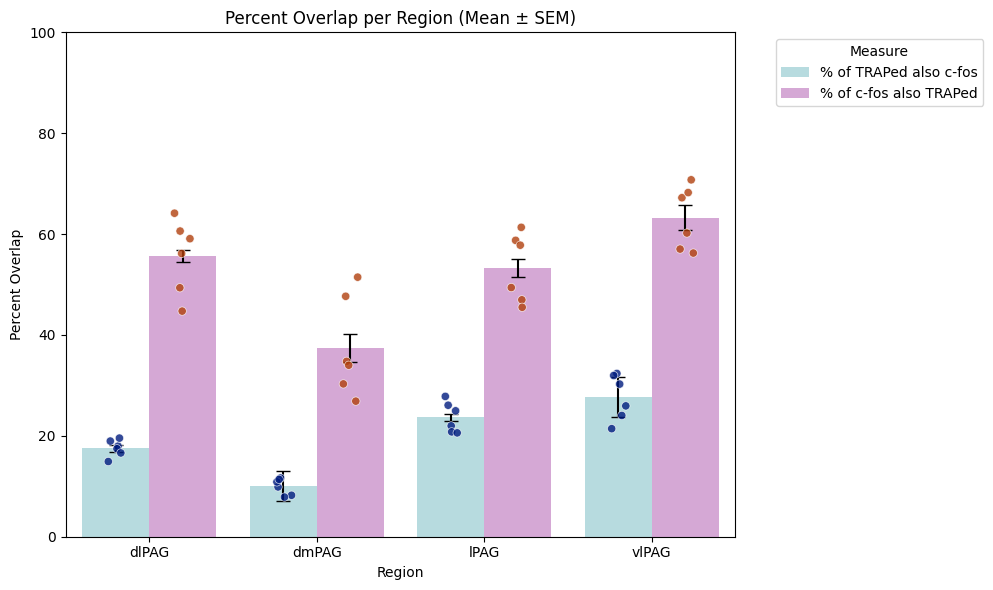

In [47]:

# Create bar plot with SEM error bars
plt.figure(figsize=(10, 6))
palette = {
    "% of TRAPed also c-fos": 'powderblue',
    "% of c-fos also TRAPed": 'plum'
}

# First, use seaborn's barplot without built-in error bars (ci=None)
bar_plot = sns.barplot(
    data=group_stats,
    x='Region',
    y='Mean',
    hue='Measure',
    palette=palette,
    errorbar=None,
    dodge=True
)

# Manually add error bars
# Get the positions of the bars
bar_positions = []
for patch in bar_plot.patches:
    bar_positions.append((patch.get_x() + patch.get_width() / 2, patch.get_height()))

# Overlay error bars manually
for (x, y), sem in zip(bar_positions, group_stats['SEM']):
    plt.errorbar(x, y, yerr=sem, fmt='none', c='black', capsize=5, linewidth=1.5)

# Overlay stripplot (dot plot) for each brain
sns.stripplot(
    data=long_df,
    x='Region',
    y='Percent',
    hue='Measure',
    dodge=True,
    jitter=True,
    marker='o',
    size=6,
    palette='dark',
    alpha=0.8,
    linewidth=0.5,
    edgecolor='white'
)

# Tidy up legend (to avoid duplicates from bar and dot plot)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Percent Overlap')
plt.title('Percent Overlap per Region (Mean ± SEM)')
plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis from 0 to 100
plt.show()

In [48]:
# # 22.3e_ trap_cfos trapthresh_0.4

# # Ensure custom region order
# region_order = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
# long_df['Region'] = pd.Categorical(long_df['Region'], categories=region_order, ordered=True)

# # Compute group means and SEMs
# group_stats = long_df.groupby(['Region', 'Measure'])['Percent'].agg(
#     Mean='mean',
#     SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
# ).reset_index()

# # Set up plot style
# palette = {
#     "% of TRAPed also c-fos": 'powderblue',
#     "% of c-fos also TRAPed": 'plum'
# }
# measures = ["% of TRAPed also c-fos", "% of c-fos also TRAPed"]

# # Create 4 subplots
# fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

# for i, region in enumerate(region_order):
#     ax = axes[i]

#     # Filter data
#     stats_sub = group_stats[group_stats['Region'] == region]
#     data_sub = long_df[long_df['Region'] == region]

#     # Create slight x-offset for spacing between bars
#     x_positions = np.array([0, 1])  # two bars per plot
#     bar_width = 0.6

#     for j, measure in enumerate(measures):
#         mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
#         sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
#         color = palette[measure]
#         xpos = x_positions[j]

#         # Draw bar with black edge
#         bar = ax.bar(
#             xpos,
#             mean,
#             yerr=sem,
#             width=bar_width,
#             color=color,
#             edgecolor='black',
#             capsize=5,
#             label=measure if i == 0 else "",  # avoid duplicate legends
#             zorder=2
#         )

#         # Overlay individual dots (brains)
#         brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
#         ax.scatter(
#             np.full(len(brain_vals), xpos),
#             brain_vals,
#             color='black',
#             s=50,
#             zorder=3,
#             alpha=0.7,
#             edgecolor='white',
#             linewidth=0.5
#         )

#     # Format each subplot
#     ax.set_xticks(x_positions)
#     ax.set_xticklabels(measures, rotation=45)
#     ax.set_title(region)
#     ax.set_ylim(0, 100)
#     ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# # Y label on first subplot
# axes[0].set_ylabel('Percent Overlap')

# # Shared legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Measure')

# plt.suptitle('Overlap by Region (Mean ± SEM)', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_2320/3715524341.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = long_df.groupby(['Region', 'Measure'])['Percent'].agg(


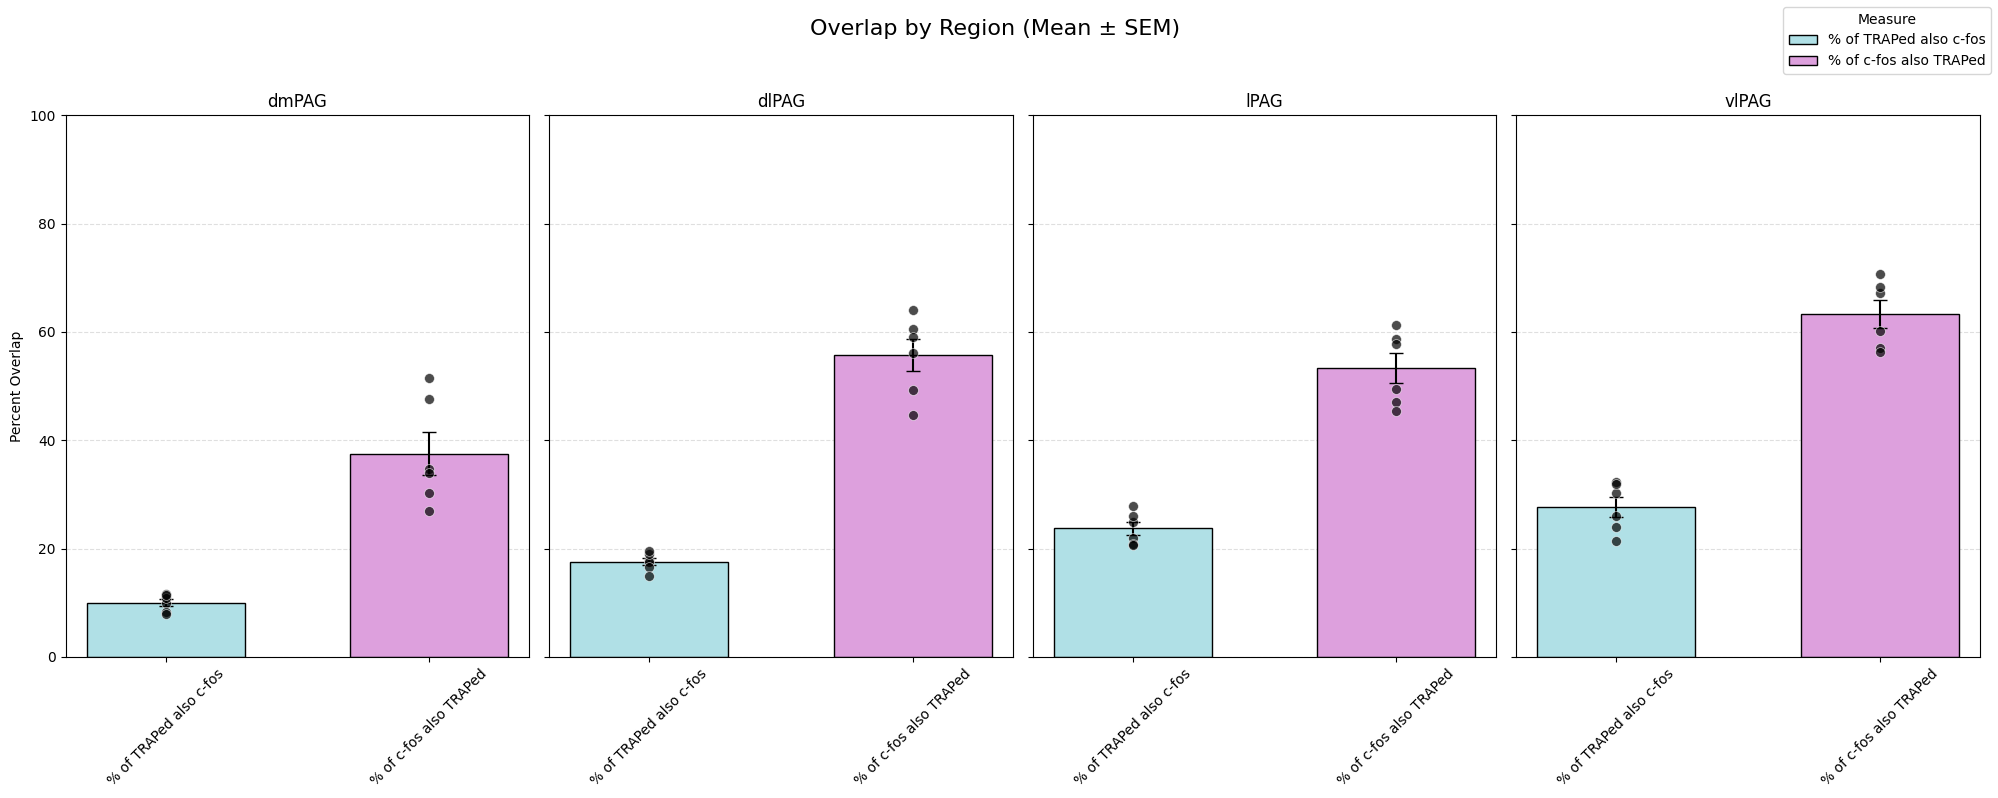

In [49]:
# 22.3e_ trap_cfos trapthresh_0.2
long_df['Region'] = pd.Categorical(long_df['Region'], categories=region_order, ordered=True)

# Compute group means and SEMs
group_stats = long_df.groupby(['Region', 'Measure'])['Percent'].agg(
    Mean='mean',
    SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
).reset_index()

# Set up plot style
palette = {
    "% of TRAPed also c-fos": 'powderblue',
    "% of c-fos also TRAPed": 'plum'
}
measures = ["% of TRAPed also c-fos", "% of c-fos also TRAPed"]

# Create 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

for i, region in enumerate(region_order):
    ax = axes[i]

    # Filter data
    stats_sub = group_stats[group_stats['Region'] == region]
    data_sub = long_df[long_df['Region'] == region]

    # Create slight x-offset for spacing between bars
    x_positions = np.array([0, 1])  # two bars per plot
    bar_width = 0.6

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = x_positions[j]

        # Draw bar with black edge
        bar = ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # avoid duplicate legends
            zorder=2
        )

        # Overlay individual dots (brains)
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

    # Format each subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels(measures, rotation=45)
    ax.set_title(region)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Y label on first subplot
axes[0].set_ylabel('Percent Overlap')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Measure')

plt.suptitle('Overlap by Region (Mean ± SEM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig_filepath = Path(f"{fig_output_dir}/overlap_combined.png")  
fig_filepath.parent.mkdir(parents=True, exist_ok=True)  
plt.savefig(fig_filepath)
plt.show()